### import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [237]:
df1 = pd.read_csv(r"D:\Business\PROJE\Python\well-being prediction\dataset\psqi.csv")

df2 = pd.read_csv(r"D:\Business\PROJE\Python\well-being prediction\dataset\PerceivedStressScale.csv")

In [238]:
pd.set_option('display.max_rows', None)
df1

,uid,type,"During the past month, what time have you usually gone to bed at night?","During the past month, how long (in minutes) has it usually taken you to fall asleep each night?",When have you usually gotten up in the morning?,"During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)",a. Cannot get to sleep within 30 minutes,b. Wake up in the middle of the night or early morning,c. Have to get up to use the bathroom,d. Cannot breathe comfortably,...,f. Feel too cold,g. Feel too hot,h. Have bad dreams,i. Have pain,j. Other reason(s),"Other reason(s), please describe, including how often you have had trouble sleeping because of this reason(s):","During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","During the past month, how would you rate your sleep quality overall?"
0,u00,pre,2:00 AM,10 mins,7:00 AM,6 hours,Not during the past month,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Once or a twice week,headaches,Not during the past month,Not during the past month,Once or a twice week,Fairly bad
1,u01,pre,1AM,20,11AM,10-Sep,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,around 1 am,"I fall asleep really quickly, maybe 5-10minutes",about 9am,about 7-8hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1am,10min,8:30am,7hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11:30,10,6:00,6:00,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good
5,u05,pre,11:30pm,15,8:00am,8,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good
6,u07,pre,Between 12a and 2a,20 minutes,between 9a and 11a,8,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
7,u08,pre,1:00 AM,15 minutes,9:00 AM,7 Hours,Once or a twice week,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Less than once week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Less than once week,Fairl

In [239]:
#datacleaning
questions = df1.columns
update_colon = ['uid'] + ['type'] + [f'q{i}' for i in range(1, len(questions) - 1)]

df1.columns = update_colon
df1

,uid,type,q1,q2,q3,q4,q5,q6,q7,q8,...,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19
0,u00,pre,2:00 AM,10 mins,7:00 AM,6 hours,Not during the past month,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Once or a twice week,headaches,Not during the past month,Not during the past month,Once or a twice week,Fairly bad
1,u01,pre,1AM,20,11AM,10-Sep,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,around 1 am,"I fall asleep really quickly, maybe 5-10minutes",about 9am,about 7-8hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1am,10min,8:30am,7hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11:30,10,6:00,6:00,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good
5,u05,pre,11:30pm,15,8:00am,8,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good
6,u07,pre,Between 12a and 2a,20 minutes,between 9a and 11a,8,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
7,u08,pre,1:00 AM,15 minutes,9:00 AM,7 Hours,Once or a twice week,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Less than once week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Less than once week,Fairly good
8,u09,pre,12:00,10,8:30,7.5,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Three or a more times week,Very good
9,u10,pre,12-1 AM,30,8:10 AM,8-Jul,Three or a more times week,Three or a more times week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Once or a twice week,Trying to solve coding problems while in bed (...,Not during the past month,Less than once week,Less than once week,Fairly good


In [240]:
#hours cleaning&standartizing function

def hours_standartizing(time_str):
    time_str = str(time_str).lower()
    time_str = re.sub(r'[^\d:]+', '', time_str)
    
    if 'am' in time_str or 'pm' in time_str:
        if 'pm' in time_str and '12' not in time_str:
            time_str = str(int(time_str.split(':')[0]) + 12) + time_str[2:]  
        elif 'am' in time_str and '12' in time_str:
            time_str = '0' + time_str.split(':')[0] + time_str[2:]  
        elif 'am' in time_str and '12' not in time_str:
            time_str = time_str  
    
    try:
        return int(time_str.split(':')[0])  
    except ValueError:
        return None

df1['q1'] = df1['q1'].apply(hours_standartizing)
df1['q3'] = df1['q3'].apply(hours_standartizing)

df1

,uid,type,q1,q2,q3,q4,q5,q6,q7,q8,...,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19
0,u00,pre,2.0,10 mins,7.0,6 hours,Not during the past month,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Once or a twice week,headaches,Not during the past month,Not during the past month,Once or a twice week,Fairly bad
1,u01,pre,1.0,20,11.0,10-Sep,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,1.0,"I fall asleep really quickly, maybe 5-10minutes",9.0,about 7-8hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1.0,10min,8.0,7hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11.0,10,6.0,6:00,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good
5,u05,pre,11.0,15,8.0,8,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good
6,u07,pre,122.0,20 minutes,911.0,8,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
7,u08,pre,1.0,15 minutes,9.0,7 Hours,Once or a twice week,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Less than once week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Less than once week,Fairly good
8,u09,pre,12.0,10,8.0,7.5,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Three or a more times week,Very good
9,u10,pre,121.0,30,8.0,8-Jul,Three or a more times week,Three or a more times week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Once or a twice week,Trying to solve coding problems while in bed (...,Not during the past month,Less than once week,Less than once week,Fairly good


In [241]:
df1.at[6, 'q1'] = 0.5
df1.at[9, 'q1'] = 0.5
df1.at[14, 'q1'] = 11.5
df1.at[31, 'q1'] = 3.5
df1.at[37, 'q1'] = 3.0
df1.at[54, 'q1'] = 0.5
df1.at[64, 'q1'] = 3.5
df1.at[78, 'q1'] = 2.5


df1

,uid,type,q1,q2,q3,q4,q5,q6,q7,q8,...,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19
0,u00,pre,2.0,10 mins,7.0,6 hours,Not during the past month,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Once or a twice week,headaches,Not during the past month,Not during the past month,Once or a twice week,Fairly bad
1,u01,pre,1.0,20,11.0,10-Sep,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,1.0,"I fall asleep really quickly, maybe 5-10minutes",9.0,about 7-8hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1.0,10min,8.0,7hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11.0,10,6.0,6:00,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good
5,u05,pre,11.0,15,8.0,8,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good
6,u07,pre,0.5,20 minutes,911.0,8,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
7,u08,pre,1.0,15 minutes,9.0,7 Hours,Once or a twice week,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Less than once week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Less than once week,Fairly good
8,u09,pre,12.0,10,8.0,7.5,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Three or a more times week,Very good
9,u10,pre,0.5,30,8.0,8-Jul,Three or a more times week,Three or a more times week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Once or a twice week,Trying to solve coding problems while in bed (...,Not during the past month,Less than once week,Less than once week,Fairly good


In [242]:
df1.at[6, 'q3'] = 10.0
df1.at[19, 'q3'] = 10.0
df1.at[31, 'q3'] = 10.0
df1.at[37, 'q3'] = 7.5
df1.at[43, 'q3'] = 9.5
df1.at[56, 'q3'] = 8.5
df1.at[70, 'q3'] = 9.0


df1 = df1.dropna(subset=['q1', 'q3'])
df1 = df1.drop([15, 18, 58])
df1

,uid,type,q1,q2,q3,q4,q5,q6,q7,q8,...,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19
0,u00,pre,2.0,10 mins,7.0,6 hours,Not during the past month,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Once or a twice week,headaches,Not during the past month,Not during the past month,Once or a twice week,Fairly bad
1,u01,pre,1.0,20,11.0,10-Sep,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,1.0,"I fall asleep really quickly, maybe 5-10minutes",9.0,about 7-8hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1.0,10min,8.0,7hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11.0,10,6.0,6:00,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good
5,u05,pre,11.0,15,8.0,8,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good
6,u07,pre,0.5,20 minutes,10.0,8,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
7,u08,pre,1.0,15 minutes,9.0,7 Hours,Once or a twice week,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Less than once week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Less than once week,Fairly good
8,u09,pre,12.0,10,8.0,7.5,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Three or a more times week,Very good
9,u10,pre,0.5,30,8.0,8-Jul,Three or a more times week,Three or a more times week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Once or a twice week,Trying to solve coding problems while in bed (...,Not during the past month,Less than once week,Less than once week,Fairly good


In [243]:
uid_counts = df1['uid'].value_counts()

# Filter 
to_remove = uid_counts[uid_counts == 1].index


df1 = df1[~df1['uid'].isin(to_remove)]
df1

,uid,type,q1,q2,q3,q4,q5,q6,q7,q8,...,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19
1,u01,pre,1.0,20,11.0,10-Sep,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,1.0,"I fall asleep really quickly, maybe 5-10minutes",9.0,about 7-8hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1.0,10min,8.0,7hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11.0,10,6.0,6:00,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good
5,u05,pre,11.0,15,8.0,8,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good
6,u07,pre,0.5,20 minutes,10.0,8,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
9,u10,pre,0.5,30,8.0,8-Jul,Three or a more times week,Three or a more times week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Once or a twice week,Trying to solve coding problems while in bed (...,Not during the past month,Less than once week,Less than once week,Fairly good
12,u14,pre,2.0,10 minutes,10.0,9 hours,Not during the past month,Once or a twice week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Not during the past month,Fairly good
13,u15,pre,1.0,5,8.0,7,Not during the past month,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Three or a more times week,Fairly good
14,u16,pre,11.5,5 min,7.0,7-Jun,Less than once week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Three or a more times week,Class work or all-nighters,Not during the past month,Not during the past month,Once or a twice week,Fairly bad


In [244]:
#q2 data cleaning

# Function to extract minutes from text
def extract_minutes(text):
    # If the text contains "min" or "mins"
    if "min" in text:
        numbers = [int(num) for num in re.findall(r'\d+', text)]
        return sum(numbers)
    else:
        return text

df1['q2'] = df1['q2'].apply(extract_minutes)
df1

<ipython-input-244-c0079bca5138>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['q2'] = df1['q2'].apply(extract_minutes)


,uid,type,q1,q2,q3,q4,q5,q6,q7,q8,...,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19
1,u01,pre,1.0,20,11.0,10-Sep,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,1.0,15,9.0,about 7-8hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1.0,10,8.0,7hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11.0,10,6.0,6:00,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good
5,u05,pre,11.0,15,8.0,8,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good
6,u07,pre,0.5,20,10.0,8,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
9,u10,pre,0.5,30,8.0,8-Jul,Three or a more times week,Three or a more times week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Once or a twice week,Trying to solve coding problems while in bed (...,Not during the past month,Less than once week,Less than once week,Fairly good
12,u14,pre,2.0,10,10.0,9 hours,Not during the past month,Once or a twice week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Not during the past month,Fairly good
13,u15,pre,1.0,5,8.0,7,Not during the past month,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Three or a more times week,Fairly good
14,u16,pre,11.5,5,7.0,7-Jun,Less than once week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Three or a more times week,Class work or all-nighters,Not during the past month,Not during the past month,Once or a twice week,Fairly bad


In [245]:
df1.at[22, 'q2'] = 60
df1.at[36, 'q2'] = 60
df1.at[64, 'q2'] = 25
df1.at[70, 'q2'] = 30
df1.at[75, 'q2'] = 20
df1.at[83, 'q2'] = 15

df1

,uid,type,q1,q2,q3,q4,q5,q6,q7,q8,...,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19
1,u01,pre,1.0,20,11.0,10-Sep,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,1.0,15,9.0,about 7-8hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1.0,10,8.0,7hours,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11.0,10,6.0,6:00,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good
5,u05,pre,11.0,15,8.0,8,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good
6,u07,pre,0.5,20,10.0,8,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
9,u10,pre,0.5,30,8.0,8-Jul,Three or a more times week,Three or a more times week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Once or a twice week,Trying to solve coding problems while in bed (...,Not during the past month,Less than once week,Less than once week,Fairly good
12,u14,pre,2.0,10,10.0,9 hours,Not during the past month,Once or a twice week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Not during the past month,Fairly good
13,u15,pre,1.0,5,8.0,7,Not during the past month,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Three or a more times week,Fairly good
14,u16,pre,11.5,5,7.0,7-Jun,Less than once week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Three or a more times week,Class work or all-nighters,Not during the past month,Not during the past month,Once or a twice week,Fairly bad


In [246]:
#q4 data cleaning

df1["q4"] = df1["q4"][~df1["q4"].str.contains(r'\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\b', case=False, regex=True)]

df1["q4"] = df1["q4"].str.extract(r'(\d+\.\d+|\d+)')

df1["q4"] = df1["q4"].astype(float)

df1

<ipython-input-246-ebcab30fa0c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["q4"] = df1["q4"][~df1["q4"].str.contains(r'\b(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)\b', case=False, regex=True)]
<ipython-input-246-ebcab30fa0c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["q4"] = df1["q4"].str.extract(r'(\d+\.\d+|\d+)')
<ipython-input-246-ebcab30fa0c0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,uid,type,q1,q2,q3,q4,q5,q6,q7,q8,...,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19
1,u01,pre,1.0,20,11.0,NaN,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,1.0,15,9.0,7.0,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1.0,10,8.0,7.0,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11.0,10,6.0,6.0,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good
5,u05,pre,11.0,15,8.0,8.0,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good
6,u07,pre,0.5,20,10.0,8.0,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
9,u10,pre,0.5,30,8.0,NaN,Three or a more times week,Three or a more times week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Once or a twice week,Trying to solve coding problems while in bed (...,Not during the past month,Less than once week,Less than once week,Fairly good
12,u14,pre,2.0,10,10.0,9.0,Not during the past month,Once or a twice week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Not during the past month,Fairly good
13,u15,pre,1.0,5,8.0,7.0,Not during the past month,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Three or a more times week,Fairly good
14,u16,pre,11.5,5,7.0,NaN,Less than once week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Three or a more times week,Class work or all-nighters,Not during the past month,Not during the past month,Once or a twice week,Fairly bad


In [247]:
df1.at[81, 'q2'] = 60
df1

,uid,type,q1,q2,q3,q4,q5,q6,q7,q8,...,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19
1,u01,pre,1.0,20,11.0,NaN,Not during the past month,Three or a more times week,Not during the past month,Not during the past month,...,Once or a twice week,Once or a twice week,Less than once week,Not during the past month,Not during the past month,NaN,Less than once week,Once or a twice week,Once or a twice week,Very good
2,u02,pre,1.0,15,9.0,7.0,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1.0,10,8.0,7.0,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11.0,10,6.0,6.0,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good
5,u05,pre,11.0,15,8.0,8.0,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good
6,u07,pre,0.5,20,10.0,8.0,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
9,u10,pre,0.5,30,8.0,NaN,Three or a more times week,Three or a more times week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Once or a twice week,Trying to solve coding problems while in bed (...,Not during the past month,Less than once week,Less than once week,Fairly good
12,u14,pre,2.0,10,10.0,9.0,Not during the past month,Once or a twice week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Not during the past month,Fairly good
13,u15,pre,1.0,5,8.0,7.0,Not during the past month,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Three or a more times week,Fairly good
14,u16,pre,11.5,5,7.0,NaN,Less than once week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Three or a more times week,Class work or all-nighters,Not during the past month,Not during the past month,Once or a twice week,Fairly bad


In [248]:
df1 = df1.drop([41, 77])
df1 = df1.dropna(subset=["q4"])

In [249]:
df1

,uid,type,q1,q2,q3,q4,q5,q6,q7,q8,...,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19
2,u02,pre,1.0,15,9.0,7.0,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1.0,10,8.0,7.0,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11.0,10,6.0,6.0,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good
5,u05,pre,11.0,15,8.0,8.0,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good
6,u07,pre,0.5,20,10.0,8.0,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
12,u14,pre,2.0,10,10.0,9.0,Not during the past month,Once or a twice week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Not during the past month,Fairly good
13,u15,pre,1.0,5,8.0,7.0,Not during the past month,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Three or a more times week,Fairly good
16,u18,pre,12.0,10,8.0,7.0,Less than once week,Less than once week,Three or a more times week,Less than once week,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Three or a more times week,Once or a twice week,Fairly good
20,u23,pre,13.0,30,8.0,6.0,NaN,Three or a more times week,NaN,NaN,...,NaN,NaN,NaN,NaN,Once or a twice week,Depressed and anxious,Three or a more times week,Less than once week,Three or a more times week,Fairly good
21,u24,pre,2.0,20,9.0,7.0,Not during the past month,Not during the past month,Less than once week,Not during the past month,...,Once or a twice week,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Three or a more times week,Fairly good


In [250]:
df1 = df1.drop(62)

In [251]:
df1 = df1.drop(20)

In [252]:
# data cleaning
questions = df1.columns
update_colon1 = ['uid'] + ['type'] + [f'q{i}' for i in range(1, 5)] + [f'q5{i}' for i in 'abcdefghij'] + ['Other'] + [f'q{i}' for i in range(6, 10)]

# update df1.columns
df1.columns = update_colon1
df1

,uid,type,q1,q2,q3,q4,q5a,q5b,q5c,q5d,...,q5f,q5g,q5h,q5i,q5j,Other,q6,q7,q8,q9
2,u02,pre,1.0,15,9.0,7.0,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
3,u03,pre,1.0,10,8.0,7.0,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good
4,u04,pre,11.0,10,6.0,6.0,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good
5,u05,pre,11.0,15,8.0,8.0,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good
6,u07,pre,0.5,20,10.0,8.0,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
12,u14,pre,2.0,10,10.0,9.0,Not during the past month,Once or a twice week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Not during the past month,Fairly good
13,u15,pre,1.0,5,8.0,7.0,Not during the past month,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Three or a more times week,Fairly good
16,u18,pre,12.0,10,8.0,7.0,Less than once week,Less than once week,Three or a more times week,Less than once week,...,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Three or a more times week,Once or a twice week,Fairly good
21,u24,pre,2.0,20,9.0,7.0,Not during the past month,Not during the past month,Less than once week,Not during the past month,...,Once or a twice week,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Three or a more times week,Fairly good
26,u33,pre,1.0,30,9.0,7.0,Once or a twice week,Not during the past month,Once or a twice week,Less than once week,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,NaN,Less than once week,Not during the past month,Three or a more times week,Fairly bad


In [253]:
# Calculate PSQI score

def calculate_psqi_score(row):
    # Component 1: Subjective sleep quality—question 9
    def calculate_component_1_score(response_q9):
        component_1_score_mapping = {
            'Very good': 0,
            'Fairly good': 1,
            'Fairly bad': 2,
            'Very bad': 3
        }
        return component_1_score_mapping.get(response_q9, 0)

    
    
    # Component 2: Sleep latency—questions 2 and 5a
    def calculate_component_2_score(response_q2, response_q5a):
        q2_value = float(response_q2)
        
        q2_subscore = 0 if int(response_q2) < 15 else (
            1 if 15 <= int(response_q2) <= 30 else (
                2 if 31 <= int(response_q2) <= 60 else 3
            )
        )

        q5a_subscore = 0 if response_q5a == 'Not during the past month' else (
            1 if response_q5a == 'Less than once week' else (
                2 if response_q5a == 'Once or a twice week' else 3
            )
        )

        component_2_score = q2_subscore + q5a_subscore

        if 1 <= component_2_score <= 2:
            return 1
        elif 3 <= component_2_score <= 4:
            return 2
        elif 5 <= component_2_score <= 6:
            return 3
        else:
            return 0
    
    def calculate_component_3_score(response_q4):
        q4_value = float(response_q4)
            
        if q4_value > 7.0:
            return 0
        elif 6.0 <= q4_value <= 7.0:
            return 1
        elif 5.0 <= q4_value < 6.0:
            return 2
        elif q4_value < 5.0:
            return 3

        
    def calculate_component_4_score(response_q1 , response_q3 , response_q4):
        q1_value = float(row['q1'])
        q3_value = float(row['q3'])
        q4_value = float(row['q4'])
        
        hours_in_bed = q3_value - q1_value if q1_value <= 6.0 else (12.0 - q1_value) + q3_value
            
        sleep_efficiency = (q4_value / hours_in_bed) * 100

        # Determine Component 4 score
        
        if sleep_efficiency > 85:
            return 0
        elif 75 <= sleep_efficiency <= 85:
            return 1
        elif 65 <= sleep_efficiency <= 74:
            return 2
        elif sleep_efficiency < 65:
            return 3
        else:
            return None
    

        
    def calculate_component_5_score(row):
        # Organize column names
        questions_5b_to_5j = [f'q5{i}' for i in 'bcdefghij']

        # Get responses for questions 5b to 5j
        responses_5b_to_5j = [row[q] for q in questions_5b_to_5j]

        # Map responses to scores
        score_mapping = {
            'Not during the past month': 0,
            'Less than once week': 1,
            'Once or a twice week': 2,
            'Three or a more times week': 3,
            'NaN': 0  
        }

        # Use the mapping to get scores, defaulting to 0 for NaN
        scores = [score_mapping.get(response, 0) for response in responses_5b_to_5j]

        # Sum the scores
        component_5_score = sum(scores)

        # Return Component 5 score based on specified intervals
        if 1 <= component_5_score <= 9:
            return 1
        elif 10 <= component_5_score <= 18:
            return 2
        elif 19 <= component_5_score <= 27:
            return 3
        else:
            return 0  # Note: If there is a value outside the specified intervals, 0 can be returned.
    
    def calculate_component_6_score(response_q6):
        component_6_score_mapping = {
            'Not during the past month' : 0,
            'Less than once week' : 1,
            'Once or a twice week' : 2,
            'Three or a more times week' : 3,
            'NaN': 0
        }
        
        return component_6_score_mapping.get(response_q6, 0)
    
    def calculate_component_7_score(response_q7, response_q8):
        q7_subscore = 0 if response_q7 == 'Not during past month' else (
            1 if response_q7 == 'Less than once week' else (
                2 if response_q7 == 'Once or a twice week' else 3
            )
        )
        
        q8_subscore = 0 if response_q8 == 'Not during past month' else (
            1 if response_q8 == 'Less than once week' else (
                2 if response_q8 == 'Once or a twice week' else 3
            )
        )
        
        component_7_score = q7_subscore + q8_subscore

        if 1 <= component_7_score <= 2:
            return 1
        elif 3 <= component_7_score <= 4:
            return 2
        elif 5 <= component_7_score <= 6:
            return 3
        else:
            return 0

            
        # Calculate component scores
    component_1 = calculate_component_1_score(row['q9'])
    component_2 = calculate_component_2_score(row['q2'], row['q5a'])
    component_3 = calculate_component_3_score(row['q4'])
    component_4 = calculate_component_4_score(row['q1'], row['q3'], row['q4'])
    component_5 = calculate_component_5_score(row)
    component_6 = calculate_component_6_score(row['q6'])
    component_7 = calculate_component_7_score(row['q7'], row['q8'])

        # Calculate PSQI score (sum of component scores)
    psqi_score = component_1 + component_2 + component_3 + component_4 + component_5 + component_6 + component_7


        # Return PSQI score
    return psqi_score     
        
        
        

df1['psqi_score'] = df1.apply(lambda row: calculate_psqi_score(row), axis=1)
df1

,uid,type,q1,q2,q3,q4,q5a,q5b,q5c,q5d,...,q5g,q5h,q5i,q5j,Other,q6,q7,q8,q9,psqi_score
2,u02,pre,1.0,15,9.0,7.0,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good,6
3,u03,pre,1.0,10,8.0,7.0,Not during the past month,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Less than once week,Fairly good,4
4,u04,pre,11.0,10,6.0,6.0,Not during the past month,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Once or a twice week,Fairly good,6
5,u05,pre,11.0,15,8.0,8.0,Less than once week,Less than once week,Less than once week,Not during the past month,...,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Not during the past month,Very good,4
6,u07,pre,0.5,20,10.0,8.0,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Less than once week,Less than once week,Not during the past month,NaN,Not during the past month,Once or a twice week,Once or a twice week,Fairly good,7
12,u14,pre,2.0,10,10.0,9.0,Not during the past month,Once or a twice week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Not during the past month,Fairly good,5
13,u15,pre,1.0,5,8.0,7.0,Not during the past month,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,NaN,Not during the past month,Less than once week,Three or a more times week,Fairly good,5
16,u18,pre,12.0,10,8.0,7.0,Less than once week,Less than once week,Three or a more times week,Less than once week,...,Not during the past month,Less than once week,Not during the past month,Not during the past month,NaN,Not during the past month,Three or a more times week,Once or a twice week,Fairly good,7
21,u24,pre,2.0,20,9.0,7.0,Not during the past month,Not during the past month,Less than once week,Not during the past month,...,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,NaN,Not during the past month,Not during the past month,Three or a more times week,Fairly good,7
26,u33,pre,1.0,30,9.0,7.0,Once or a twice week,Not during the past month,Once or a twice week,Less than once week,...,Not during the past month,Not during the past month,Not during the past month,NaN,NaN,Less than once week,Not during the past month,Three or a more times week,Fairly bad,10


In [254]:
#Calculate PSS Score

def calculate_pss_score(row):
    
    def calculate_q1(response_q1):
        q1_mapping = {
            'Never' : 0,
            'Almost never' : 1,
            'Sometime' : 2,
            'Fairly often' : 3,
            'Very often' : 4,
            'NaN': 0
            
        }
        
        return q1_mapping.get(response_q1, 0)


    def calculate_q2(response_q2):
        q2_mapping = {
            'Never' : 0,
            'Almost never' : 1,
            'Sometime' : 2,
            'Fairly often' : 3,
            'Very often' : 4,
            'NaN': 0
            
        }
        
        return q2_mapping.get(response_q2, 0)
    

    def calculate_q3(response_q3):
        q3_mapping = {
            'Never' : 0,
            'Almost never' : 1,
            'Sometime' : 2,
            'Fairly often' : 3,
            'Very often' : 4,
            'NaN': 0
            
        }
        
        return q3_mapping.get(response_q3, 0)
    
    def calculate_q4(response_q4):
        q4_mapping = {
            'Never' : 4,
            'Almost never' : 3,
            'Sometime' : 2,
            'Fairly often' : 1,
            'Very often' : 0,
            'NaN': 0
            
        }
        
        return q4_mapping.get(response_q4, 0)

    
    def calculate_q5(response_q5):
        q5_mapping = {
            'Never' : 4,
            'Almost never' : 3,
            'Sometime' : 2,
            'Fairly often' : 1,
            'Very often' : 0,
            'NaN': 0
            
        }
        
        return q5_mapping.get(response_q5, 0)
    
    
    def calculate_q6(response_q6):
        q6_mapping = {
            'Never' : 0,
            'Almost never' : 1,
            'Sometime' : 2,
            'Fairly often' : 3,
            'Very often' : 4,
            'NaN': 0
            
        }
        
        return q6_mapping.get(response_q6, 0)
    

    def calculate_q7(response_q7):
        q7_mapping = {
            'Never' : 4,
            'Almost never' : 3,
            'Sometime' : 2,
            'Fairly often' : 1,
            'Very often' : 0,
            'NaN': 0
            
        }
        
        return q7_mapping.get(response_q7, 0)
    
    
    def calculate_q8(response_q8):
        q8_mapping = {
            'Never' : 4,
            'Almost never' : 3,
            'Sometime' : 2,
            'Fairly often' : 1,
            'Very often' : 0,
            'NaN': 0
            
        }
        
        return q8_mapping.get(response_q8, 0)

    
    def calculate_q9(response_q9):
        q9_mapping = {
            'Never' : 0,
            'Almost never' : 1,
            'Sometime' : 2,
            'Fairly often' : 3,
            'Very often' : 4,
            'NaN': 0
            
        }
        
        return q9_mapping.get(response_q9, 0)

    
    def calculate_q10(response_q10):
        q10_mapping = {
            'Never' : 0,
            'Almost never' : 1,
            'Sometime' : 2,
            'Fairly often' : 3,
            'Very often' : 4,
            'NaN': 0
            
        }
        
        return q10_mapping.get(response_q10, 0)
    
    q1 = calculate_q1(row['1. In the last month, how often have you been upset because of something that happened unexpectedly?'])
    q2 = calculate_q2(row['2. In the last month, how often have you felt that you were unable to control the important things in your life?'])
    q3 = calculate_q3(row['3. In the last month, how often have you felt nervous and "stressed"?'])
    q4 = calculate_q4(row['4. In the last month, how often have you felt confident about your ability to handle your personal problems?'])
    q5 = calculate_q5(row['5. In the last month, how often have you felt that things were going your way?'])
    q6 = calculate_q6(row['6. In the last month, how often have you found that you could not cope with all the things that you had to do?'])
    q7 = calculate_q7(row['7. In the last month, how often have you been able to control irritations in your life?'])
    q8 = calculate_q8(row['8. In the last month, how often have you felt that you were on top of things?'])
    q9 = calculate_q9(row['9. In the last month, how often have you been angered because of things that were outside of your control?'])
    q10 = calculate_q10(row['10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?'])
    
    
    pss_score = q1 + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9 + q10
    
    
    return pss_score




df2['pss_score'] = df2.apply(lambda row: calculate_pss_score(row), axis=1)

df2
        

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",pss_score
0,u00,pre,Sometime,Sometime,Fairly often,Fairly often,Sometime,Very often,Sometime,Sometime,Fairly often,Fairly often,24
1,u01,pre,Sometime,Sometime,Sometime,Sometime,Fairly often,Sometime,Fairly often,Fairly often,Almost never,Almost never,15
2,u02,pre,Fairly often,Sometime,Sometime,Fairly often,Almost never,Sometime,Almost never,Sometime,Sometime,Almost never,21
3,u03,pre,Sometime,Almost never,Sometime,Almost never,Sometime,Never,Almost never,Never,Never,Never,17
4,u04,pre,Almost never,Almost never,Fairly often,Sometime,Sometime,Fairly often,Sometime,Almost never,Sometime,Sometime,21
5,u05,pre,Almost never,Sometime,Almost never,Very often,Very often,Almost never,Fairly often,Very often,Almost never,Never,7
6,u07,pre,Sometime,Almost never,Fairly often,Very often,Very often,Almost never,Fairly often,Fairly often,Sometime,Almost never,12
7,u08,pre,Sometime,Fairly often,Very often,Sometime,Sometime,Sometime,Fairly often,Sometime,Sometime,Fairly often,23
8,u09,pre,Almost never,Almost never,Sometime,Sometime,Fairly often,Almost never,Fairly often,Sometime,Almost never,Almost never,13
9,u10,pre,Fairly often,Fairly often,Fairly often,Fairly often,Fairly often,Sometime,Almost never,Very often,Fairly often,Almost never,20


In [255]:
df2 = df2[df2.set_index(['uid', 'type']).index.isin(df1.set_index(['uid', 'type']).index)].reset_index(drop=True)

df2

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",pss_score
0,u02,pre,Fairly often,Sometime,Sometime,Fairly often,Almost never,Sometime,Almost never,Sometime,Sometime,Almost never,21
1,u03,pre,Sometime,Almost never,Sometime,Almost never,Sometime,Never,Almost never,Never,Never,Never,17
2,u04,pre,Almost never,Almost never,Fairly often,Sometime,Sometime,Fairly often,Sometime,Almost never,Sometime,Sometime,21
3,u05,pre,Almost never,Sometime,Almost never,Very often,Very often,Almost never,Fairly often,Very often,Almost never,Never,7
4,u07,pre,Sometime,Almost never,Fairly often,Very often,Very often,Almost never,Fairly often,Fairly often,Sometime,Almost never,12
5,u14,pre,Almost never,Never,Sometime,Fairly often,Sometime,Almost never,Very often,Very often,Almost never,Almost never,9
6,u15,pre,Fairly often,Sometime,Fairly often,Sometime,Sometime,Sometime,Sometime,Sometime,Sometime,Sometime,22
7,u18,pre,Fairly often,Fairly often,Fairly often,Fairly often,Almost never,Fairly often,Almost never,Sometime,Fairly often,Fairly often,27
8,u24,pre,Sometime,Almost never,Fairly often,Fairly often,Fairly often,Sometime,Sometime,Almost never,Sometime,Almost never,18
9,u33,pre,Fairly often,Very often,Very often,Almost never,Almost never,Very often,Almost never,Never,Sometime,Fairly often,33


In [256]:
df1.reset_index(drop=True, inplace=True)
df1

df2.reset_index(drop=True, inplace=True)
df2

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",pss_score
0,u02,pre,Fairly often,Sometime,Sometime,Fairly often,Almost never,Sometime,Almost never,Sometime,Sometime,Almost never,21
1,u03,pre,Sometime,Almost never,Sometime,Almost never,Sometime,Never,Almost never,Never,Never,Never,17
2,u04,pre,Almost never,Almost never,Fairly often,Sometime,Sometime,Fairly often,Sometime,Almost never,Sometime,Sometime,21
3,u05,pre,Almost never,Sometime,Almost never,Very often,Very often,Almost never,Fairly often,Very often,Almost never,Never,7
4,u07,pre,Sometime,Almost never,Fairly often,Very often,Very often,Almost never,Fairly often,Fairly often,Sometime,Almost never,12
5,u14,pre,Almost never,Never,Sometime,Fairly often,Sometime,Almost never,Very often,Very often,Almost never,Almost never,9
6,u15,pre,Fairly often,Sometime,Fairly often,Sometime,Sometime,Sometime,Sometime,Sometime,Sometime,Sometime,22
7,u18,pre,Fairly often,Fairly often,Fairly often,Fairly often,Almost never,Fairly often,Almost never,Sometime,Fairly often,Fairly often,27
8,u24,pre,Sometime,Almost never,Fairly often,Fairly often,Fairly often,Sometime,Sometime,Almost never,Sometime,Almost never,18
9,u33,pre,Fairly often,Very often,Very often,Almost never,Almost never,Very often,Almost never,Never,Sometime,Fairly often,33


In [263]:
uids = df1['uid'] 
types = df1['type'] 
psqi_score = df1['psqi_score']
pss_score = df2['pss_score']

uids = df1['uid'] 
types = df1['type'] 
psqi_score = df1['psqi_score']
pss_score = df2['pss_score']

data = {'uid': uids,
        'type': types,
        'psqi_score': psqi_score,
        'pss_score': pss_score}

df3 = pd.DataFrame(data)

# PSS ve PSQI skorlarını normallendirme
scaler = StandardScaler()
df3[['psqi_score', 'pss_score']] = scaler.fit_transform(df3[['psqi_score', 'pss_score']])

# Mental Health Score Value'yu hesaplama
df3['mental_health_score'] = df3['psqi_score'] + df3['pss_score']

q1 = df3['mental_health_score'].quantile(0.25)
q3 = df3['mental_health_score'].quantile(0.75)

def label_encoding(score):
    if score <= q1:
        return 0  # 'Good'
    elif q1 < score <= q3:
        return 1  # 'Average'
    else:
        return 2  # 'High'

# Label encoding uygulama
df3['wellbeing_label'] = df3['mental_health_score'].apply(label_encoding)

df3

,uid,type,psqi_score,pss_score,mental_health_score,wellbeing_label
0,u02,pre,-0.075338,0.475356,0.400018,1
1,u03,pre,-0.922887,-0.153792,-1.076679,0
2,u04,pre,-0.075338,0.475356,0.400018,1
3,u05,pre,-0.922887,-1.726661,-2.649548,0
4,u07,pre,0.348437,-0.940226,-0.591789,1
5,u14,pre,-0.499112,-1.412087,-1.911199,0
6,u15,pre,-0.499112,0.632643,0.133531,1
7,u18,pre,0.348437,1.419077,1.767514,2
8,u24,pre,0.348437,0.003495,0.351932,1
9,u33,pre,1.619761,2.362799,3.982560,2


NaN değer sayısı: 0


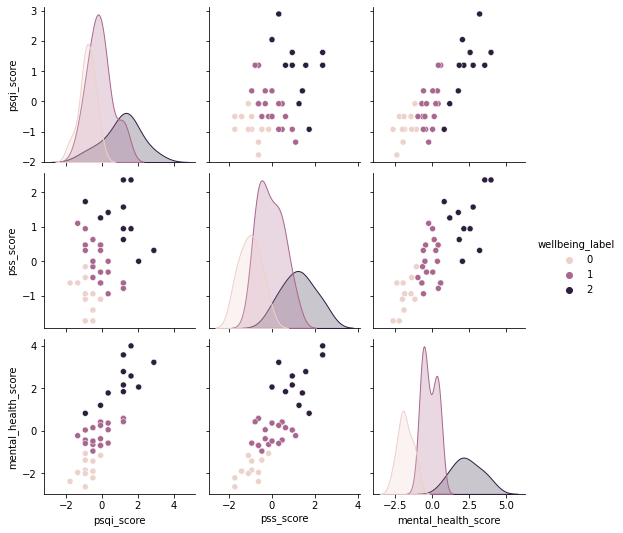

Correlation Matrix (Filled):
                 pss_score  psqi_score  wellbeing_label
pss_score         1.000000    0.324647         0.802079
psqi_score        0.324647    1.000000         0.687639
wellbeing_label   0.802079    0.687639         1.000000


In [264]:
print("NaN değer sayısı:", df3['wellbeing_label'].isna().sum())

# Input Scaling
scaler = StandardScaler()
df3[['pss_score', 'psqi_score']] = scaler.fit_transform(df3[['pss_score', 'psqi_score']])

# Pairplot
df3.dropna(subset=['wellbeing_label'], inplace=True)
sns.pairplot(df3, hue='wellbeing_label', diag_kind='kde')
plt.show()

correlation_matrix_filled = df3[['pss_score', 'psqi_score', 'wellbeing_label']].corr()
print("Correlation Matrix (Filled):")
print(correlation_matrix_filled)

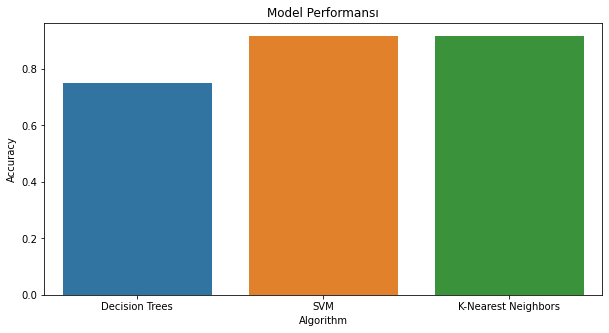

Decision Tree Metrics:
(0.75, 0.7888888888888889, 0.75, 0.7636363636363637)

SVM Metrics:
(0.9166666666666666, 0.9285714285714285, 0.9166666666666666, 0.905982905982906)

K-Nearest Neighbors Metrics:
(0.9166666666666666, 0.9285714285714285, 0.9166666666666666, 0.905982905982906)


In [269]:
features = df3[['pss_score', 'psqi_score']]
labels = df3['wellbeing_label']


X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

# Modelleri eğit
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


dt_predictions = dt_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)


def evaluate_model(predictions, y_true):
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions, average='weighted')
    recall = recall_score(y_true, predictions, average='weighted')
    f1 = f1_score(y_true, predictions, average='weighted')
    return accuracy, precision, recall, f1

# Decision Tree
dt_metrics = evaluate_model(dt_predictions, y_test)

# SVM
svm_metrics = evaluate_model(svm_predictions, y_test)

# K-Nearest Neighbors
knn_metrics = evaluate_model(knn_predictions, y_test)

# Sonuçları görselleştir
results = pd.DataFrame({
    'Algorithm': ['Decision Trees', 'SVM', 'K-Nearest Neighbors'],
    'Accuracy': [dt_metrics[0], svm_metrics[0], knn_metrics[0]],
    'Precision': [dt_metrics[1], svm_metrics[1], knn_metrics[1]],
    'Recall': [dt_metrics[2], svm_metrics[2], knn_metrics[2]],
    'F1-score': [dt_metrics[3], svm_metrics[3], knn_metrics[3]]
})

plt.figure(figsize=(10, 5))
sns.barplot(x='Algorithm', y='Accuracy', data=results)
plt.title('Model Performansı')
plt.show()

print("Decision Tree Metrics:")
print(dt_metrics)
print("\nSVM Metrics:")
print(svm_metrics)
print("\nK-Nearest Neighbors Metrics:")
print(knn_metrics)

In [270]:
results = {
    'Algorithm': ['Decision Trees', 'Support Vector Machine(SVM)', 'K-Nearest Neighbors'],
    'Accuracy': [0.75, 0.9166666666666666, 0.9166666666666666],
    'Precision': [0.7888888888888889, 0.9285714285714285, 0.9285714285714285],
    'Recall': [0.75, 0.9166666666666666, 0.9166666666666666],
    'F1-Score': [0.7636363636363637, 0.905982905982906, 0.905982905982906]
}


your_results = pd.DataFrame(results)

your_results = your_results.round({'Accuracy': 2, 'Precision': 2, 'Recall': 2, 'F1-Score': 2})

print(your_results)

                     Algorithm  Accuracy  Precision  Recall  F1-Score
0               Decision Trees      0.75       0.79    0.75      0.76
1  Support Vector Machine(SVM)      0.92       0.93    0.92      0.91
2          K-Nearest Neighbors      0.92       0.93    0.92      0.91


In [340]:
df4 = pd.read_csv(r"D:\Business\DERS PDFLERI 4.Sınıf Güz\Machine Learning\PSQI (Pittsburgh Sleep Quality Index) (Yanıtlar) - Form Yanıtları 1 (1).csv")

df5 = pd.read_csv(r"D:\Business\DERS PDFLERI 4.Sınıf Güz\Machine Learning\PSS (Perceived Stress Scale) (Yanıtlar) - Form Yanıtları 1.csv")

In [341]:
df4

,Zaman damgası,uid,type,"Q1.During the past month, what time have you usually gone to bed at night?","Q2. During the past month, how long (in minutes) has it usually taken you to fall asleep each night? (20 dakika ise buna sadece ""20"" yazın)",Q3. When have you usually gotten up in the morning?,"Q4. During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)","Q5 During the past month, how often have you had Not during Less than Once or Three or more trouble sleeping because you… \n\nQ5a. Cannot get to sleep within 30 minutes",Q5b. ...Wake up in the middle of the night or early morning,Q5c. ...Have to get up to use the bathroom,...,Q5e. ...Cough or snore loudly,Q5f. ...Feel too cold,Q5g. ...Feel too hot,Q5h. ...Have bad dreams,Q5i. ...Have pain,Q5j. ...Other reason(s),"Q6. During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","Q7. During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","Q8. During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","Q9. ...During the past month, how would you rate your sleep quality overall?"
0,24.12.2023 16:06:51,yagmur guzeloglu,pre,1.0,5,9.0,8.0,Once or a twice week,Three or a more times week,Less than once week,...,Not during the past month,Less than once week,Less than once week,Three or a more times week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Fairly bad
1,24.12.2023 16:12:40,Ronayi,pre,12.0,25,7.5,7.0,Three or a more times week,Once or a twice week,Less than once week,...,Not during the past month,Once or a twice week,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Less than once week,Less than once week,Fairly good
2,24.12.2023 17:24:28,Nazlı Gül Erdoğan,pre,3.0,40,7.0,4.0,Three or a more times week,Three or a more times week,Three or a more times week,...,Less than once week,Three or a more times week,Three or a more times week,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Three or a more times week,Three or a more times week,Very bad
3,24.12.2023 21:05:12,Bilge,pre,3.5,30,12.0,6.0,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Fairly bad
4,25.12.2023 00:29:46,Furkan Kaya,pre,1.0,10,9.0,7.0,Less than once week,Less than once week,Less than once week,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
5,25.12.2023 00:31:29,İrem Bayındır,pre,1.0,20,8.5,7.5,Not during the past month,Less than once week,Not during the past month,...,Not during the past month,Three or a more times week,Once or a twice week,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Fairly good
6,25.12.2023 00:37:12,Kaan,pre,1.5,5,8.5,6.5,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Very good
7,25.12.2023 00:40:36,fey,pre,1.0,30,8.5,9.0,Not during the past month,Less than once week,Once or a twice week,...,Not during the past month,Less than once week,Less than once week,Three or a more times 

In [342]:
df5

,Zaman damgası,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and stressed?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that happened that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?"
0,24.12.2023 19:11:12,Nazlı Gül Erdoğan,pre,Fairly often,Very often,Very often,Sometime,Sometime,Very often,Almost never,Sometime,Very often,Fairly often
1,24.12.2023 20:05:50,yagmur guzeloglu,pre,Fairly often,Very often,Very often,Sometime,Sometime,Very often,Sometime,Almost never,Fairly often,Very often
2,24.12.2023 20:21:15,Enes,pre,Fairly often,Never,Fairly often,Sometime,Almost never,Sometime,Fairly often,Sometime,Very often,Fairly often
3,24.12.2023 21:03:16,Bilge,pre,Very often,Very often,Very often,Almost never,Almost never,Almost never,Almost never,Sometime,Very often,Fairly often
4,25.12.2023 00:32:03,Furkan Kaya,pre,Sometime,Sometime,Fairly often,Fairly often,Sometime,Sometime,Fairly often,Fairly often,Sometime,Sometime
5,25.12.2023 00:38:28,İrem Bayındır,pre,Sometime,Fairly often,Very often,Fairly often,Fairly often,Sometime,Fairly often,Sometime,Fairly often,Fairly often
6,25.12.2023 00:42:08,fey,pre,Fairly often,Sometime,Very often,Sometime,Almost never,Sometime,Sometime,Fairly often,Very often,Sometime
7,25.12.2023 00:42:14,Kaan,pre,Sometime,Sometime,Never,Very often,Fairly often,Sometime,Very often,Sometime,Sometime,Never
8,25.12.2023 01:01:40,Alperen,pre,Fairly often,Fairly often,Sometime,Sometime,Almost never,Fairly often,Almost never,Sometime,Very often,Very often
9,25.12.2023 01:22:19,antep,pre,Fairly often,Fairly often,Very often,Very often,Very often,Very often,Never,Sometime,Sometime,Sometime


In [343]:
# sort

df4 = df4.drop(df4.index[1])
df4 = df4.reset_index(drop=True)

df4


,Zaman damgası,uid,type,"Q1.During the past month, what time have you usually gone to bed at night?","Q2. During the past month, how long (in minutes) has it usually taken you to fall asleep each night? (20 dakika ise buna sadece ""20"" yazın)",Q3. When have you usually gotten up in the morning?,"Q4. During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)","Q5 During the past month, how often have you had Not during Less than Once or Three or more trouble sleeping because you… \n\nQ5a. Cannot get to sleep within 30 minutes",Q5b. ...Wake up in the middle of the night or early morning,Q5c. ...Have to get up to use the bathroom,...,Q5e. ...Cough or snore loudly,Q5f. ...Feel too cold,Q5g. ...Feel too hot,Q5h. ...Have bad dreams,Q5i. ...Have pain,Q5j. ...Other reason(s),"Q6. During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","Q7. During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","Q8. During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","Q9. ...During the past month, how would you rate your sleep quality overall?"
0,24.12.2023 16:06:51,yagmur guzeloglu,pre,1.0,5,9.0,8.0,Once or a twice week,Three or a more times week,Less than once week,...,Not during the past month,Less than once week,Less than once week,Three or a more times week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Fairly bad
1,24.12.2023 17:24:28,Nazlı Gül Erdoğan,pre,3.0,40,7.0,4.0,Three or a more times week,Three or a more times week,Three or a more times week,...,Less than once week,Three or a more times week,Three or a more times week,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Three or a more times week,Three or a more times week,Very bad
2,24.12.2023 21:05:12,Bilge,pre,3.5,30,12.0,6.0,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Fairly bad
3,25.12.2023 00:29:46,Furkan Kaya,pre,1.0,10,9.0,7.0,Less than once week,Less than once week,Less than once week,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
4,25.12.2023 00:31:29,İrem Bayındır,pre,1.0,20,8.5,7.5,Not during the past month,Less than once week,Not during the past month,...,Not during the past month,Three or a more times week,Once or a twice week,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Fairly good
5,25.12.2023 00:37:12,Kaan,pre,1.5,5,8.5,6.5,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Very good
6,25.12.2023 00:40:36,fey,pre,1.0,30,8.5,9.0,Not during the past month,Less than once week,Once or a twice week,...,Not during the past month,Less than once week,Less than once week,Three or a more times week,Three or a more times week,Not during the past month,Once or a twice week,Three or a more times week,Less than once week,Fairly good
7,25.12.2023 01:06:03,Alperen,pre,3.0,15,10.0,6.5,Once or a twice week,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Not during the past mo

In [344]:
index_to_move = 16 
target_index = 2    


moved_row_values = df4.iloc[index_to_move].copy()


df4 = df4.drop(index_to_move)


df4 = pd.concat([df4.iloc[:target_index], pd.DataFrame([moved_row_values], columns=df4.columns), df4.iloc[target_index:]], ignore_index=True)
df4

,Zaman damgası,uid,type,"Q1.During the past month, what time have you usually gone to bed at night?","Q2. During the past month, how long (in minutes) has it usually taken you to fall asleep each night? (20 dakika ise buna sadece ""20"" yazın)",Q3. When have you usually gotten up in the morning?,"Q4. During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)","Q5 During the past month, how often have you had Not during Less than Once or Three or more trouble sleeping because you… \n\nQ5a. Cannot get to sleep within 30 minutes",Q5b. ...Wake up in the middle of the night or early morning,Q5c. ...Have to get up to use the bathroom,...,Q5e. ...Cough or snore loudly,Q5f. ...Feel too cold,Q5g. ...Feel too hot,Q5h. ...Have bad dreams,Q5i. ...Have pain,Q5j. ...Other reason(s),"Q6. During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","Q7. During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","Q8. During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","Q9. ...During the past month, how would you rate your sleep quality overall?"
0,24.12.2023 16:06:51,yagmur guzeloglu,pre,1.0,5,9.0,8.0,Once or a twice week,Three or a more times week,Less than once week,...,Not during the past month,Less than once week,Less than once week,Three or a more times week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Fairly bad
1,24.12.2023 17:24:28,Nazlı Gül Erdoğan,pre,3.0,40,7.0,4.0,Three or a more times week,Three or a more times week,Three or a more times week,...,Less than once week,Three or a more times week,Three or a more times week,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Three or a more times week,Three or a more times week,Very bad
2,25.12.2023 08:53:50,Enes,pre,11.5,5,6.0,7.0,Not during the past month,Three or a more times week,Not during the past month,...,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Once or a twice week,Once or a twice week,Very good
3,24.12.2023 21:05:12,Bilge,pre,3.5,30,12.0,6.0,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Fairly bad
4,25.12.2023 00:29:46,Furkan Kaya,pre,1.0,10,9.0,7.0,Less than once week,Less than once week,Less than once week,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
5,25.12.2023 00:31:29,İrem Bayındır,pre,1.0,20,8.5,7.5,Not during the past month,Less than once week,Not during the past month,...,Not during the past month,Three or a more times week,Once or a twice week,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Fairly good
6,25.12.2023 00:37:12,Kaan,pre,1.5,5,8.5,6.5,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Very good
7,25.12.2023 00:40:36,fey,pre,1.0,30,8.5,9.0,Not during the past month,Less than once week,Once or a twice week,...,Not during the past month,Less than once week,Less than once week,Three or a more 

In [345]:
df4.iloc[0], df4.iloc[1] = df4.iloc[1].copy(), df4.iloc[0].copy()
df4

,Zaman damgası,uid,type,"Q1.During the past month, what time have you usually gone to bed at night?","Q2. During the past month, how long (in minutes) has it usually taken you to fall asleep each night? (20 dakika ise buna sadece ""20"" yazın)",Q3. When have you usually gotten up in the morning?,"Q4. During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)","Q5 During the past month, how often have you had Not during Less than Once or Three or more trouble sleeping because you… \n\nQ5a. Cannot get to sleep within 30 minutes",Q5b. ...Wake up in the middle of the night or early morning,Q5c. ...Have to get up to use the bathroom,...,Q5e. ...Cough or snore loudly,Q5f. ...Feel too cold,Q5g. ...Feel too hot,Q5h. ...Have bad dreams,Q5i. ...Have pain,Q5j. ...Other reason(s),"Q6. During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","Q7. During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","Q8. During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","Q9. ...During the past month, how would you rate your sleep quality overall?"
0,24.12.2023 17:24:28,Nazlı Gül Erdoğan,pre,3.0,40,7.0,4.0,Three or a more times week,Three or a more times week,Three or a more times week,...,Less than once week,Three or a more times week,Three or a more times week,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Three or a more times week,Three or a more times week,Very bad
1,24.12.2023 16:06:51,yagmur guzeloglu,pre,1.0,5,9.0,8.0,Once or a twice week,Three or a more times week,Less than once week,...,Not during the past month,Less than once week,Less than once week,Three or a more times week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Fairly bad
2,25.12.2023 08:53:50,Enes,pre,11.5,5,6.0,7.0,Not during the past month,Three or a more times week,Not during the past month,...,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Once or a twice week,Once or a twice week,Very good
3,24.12.2023 21:05:12,Bilge,pre,3.5,30,12.0,6.0,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Fairly bad
4,25.12.2023 00:29:46,Furkan Kaya,pre,1.0,10,9.0,7.0,Less than once week,Less than once week,Less than once week,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
5,25.12.2023 00:31:29,İrem Bayındır,pre,1.0,20,8.5,7.5,Not during the past month,Less than once week,Not during the past month,...,Not during the past month,Three or a more times week,Once or a twice week,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Fairly good
6,25.12.2023 00:37:12,Kaan,pre,1.5,5,8.5,6.5,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Very good
7,25.12.2023 00:40:36,fey,pre,1.0,30,8.5,9.0,Not during the past month,Less than once week,Once or a twice week,...,Not during the past month,Less than once week,Less than once week,Three or a more 

In [346]:
df4.iloc[6], df4.iloc[7] = df4.iloc[7].copy(), df4.iloc[6].copy()
df4


,Zaman damgası,uid,type,"Q1.During the past month, what time have you usually gone to bed at night?","Q2. During the past month, how long (in minutes) has it usually taken you to fall asleep each night? (20 dakika ise buna sadece ""20"" yazın)",Q3. When have you usually gotten up in the morning?,"Q4. During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)","Q5 During the past month, how often have you had Not during Less than Once or Three or more trouble sleeping because you… \n\nQ5a. Cannot get to sleep within 30 minutes",Q5b. ...Wake up in the middle of the night or early morning,Q5c. ...Have to get up to use the bathroom,...,Q5e. ...Cough or snore loudly,Q5f. ...Feel too cold,Q5g. ...Feel too hot,Q5h. ...Have bad dreams,Q5i. ...Have pain,Q5j. ...Other reason(s),"Q6. During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","Q7. During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","Q8. During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","Q9. ...During the past month, how would you rate your sleep quality overall?"
0,24.12.2023 17:24:28,Nazlı Gül Erdoğan,pre,3.0,40,7.0,4.0,Three or a more times week,Three or a more times week,Three or a more times week,...,Less than once week,Three or a more times week,Three or a more times week,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Three or a more times week,Three or a more times week,Very bad
1,24.12.2023 16:06:51,yagmur guzeloglu,pre,1.0,5,9.0,8.0,Once or a twice week,Three or a more times week,Less than once week,...,Not during the past month,Less than once week,Less than once week,Three or a more times week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Fairly bad
2,25.12.2023 08:53:50,Enes,pre,11.5,5,6.0,7.0,Not during the past month,Three or a more times week,Not during the past month,...,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Once or a twice week,Once or a twice week,Very good
3,24.12.2023 21:05:12,Bilge,pre,3.5,30,12.0,6.0,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Fairly bad
4,25.12.2023 00:29:46,Furkan Kaya,pre,1.0,10,9.0,7.0,Less than once week,Less than once week,Less than once week,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
5,25.12.2023 00:31:29,İrem Bayındır,pre,1.0,20,8.5,7.5,Not during the past month,Less than once week,Not during the past month,...,Not during the past month,Three or a more times week,Once or a twice week,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Fairly good
6,25.12.2023 00:40:36,fey,pre,1.0,30,8.5,9.0,Not during the past month,Less than once week,Once or a twice week,...,Not during the past month,Less than once week,Less than once week,Three or a more times week,Three or a more times week,Not during the past month,Once or a twice week,Three or a more times week,Less than once week,Fairly good
7,25.12.2023 00:37:12,Kaan,pre,1.5,5,8.5,6.5,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Less than once w

In [347]:
index_to_move = 15 
target_index = 11    


moved_row_values = df4.iloc[index_to_move].copy()


df4 = df4.drop(index_to_move)


df4 = pd.concat([df4.iloc[:target_index], pd.DataFrame([moved_row_values], columns=df4.columns), df4.iloc[target_index:]], ignore_index=True)
df4

,Zaman damgası,uid,type,"Q1.During the past month, what time have you usually gone to bed at night?","Q2. During the past month, how long (in minutes) has it usually taken you to fall asleep each night? (20 dakika ise buna sadece ""20"" yazın)",Q3. When have you usually gotten up in the morning?,"Q4. During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)","Q5 During the past month, how often have you had Not during Less than Once or Three or more trouble sleeping because you… \n\nQ5a. Cannot get to sleep within 30 minutes",Q5b. ...Wake up in the middle of the night or early morning,Q5c. ...Have to get up to use the bathroom,...,Q5e. ...Cough or snore loudly,Q5f. ...Feel too cold,Q5g. ...Feel too hot,Q5h. ...Have bad dreams,Q5i. ...Have pain,Q5j. ...Other reason(s),"Q6. During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","Q7. During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","Q8. During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","Q9. ...During the past month, how would you rate your sleep quality overall?"
0,24.12.2023 17:24:28,Nazlı Gül Erdoğan,pre,3.0,40,7.0,4.0,Three or a more times week,Three or a more times week,Three or a more times week,...,Less than once week,Three or a more times week,Three or a more times week,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Three or a more times week,Three or a more times week,Very bad
1,24.12.2023 16:06:51,yagmur guzeloglu,pre,1.0,5,9.0,8.0,Once or a twice week,Three or a more times week,Less than once week,...,Not during the past month,Less than once week,Less than once week,Three or a more times week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Fairly bad
2,25.12.2023 08:53:50,Enes,pre,11.5,5,6.0,7.0,Not during the past month,Three or a more times week,Not during the past month,...,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Once or a twice week,Once or a twice week,Very good
3,24.12.2023 21:05:12,Bilge,pre,3.5,30,12.0,6.0,Three or a more times week,Three or a more times week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Fairly bad
4,25.12.2023 00:29:46,Furkan Kaya,pre,1.0,10,9.0,7.0,Less than once week,Less than once week,Less than once week,...,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
5,25.12.2023 00:31:29,İrem Bayındır,pre,1.0,20,8.5,7.5,Not during the past month,Less than once week,Not during the past month,...,Not during the past month,Three or a more times week,Once or a twice week,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Fairly good
6,25.12.2023 00:40:36,fey,pre,1.0,30,8.5,9.0,Not during the past month,Less than once week,Once or a twice week,...,Not during the past month,Less than once week,Less than once week,Three or a more times week,Three or a more times week,Not during the past month,Once or a twice week,Three or a more times week,Less than once week,Fairly good
7,25.12.2023 00:37:12,Kaan,pre,1.5,5,8.5,6.5,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Once or a twice week,Less than once w

In [348]:
df4 = df4.drop(columns=['Zaman damgası'])
df5 = df5.drop(columns=['Zaman damgası'])

In [349]:
df4

,uid,type,"Q1.During the past month, what time have you usually gone to bed at night?","Q2. During the past month, how long (in minutes) has it usually taken you to fall asleep each night? (20 dakika ise buna sadece ""20"" yazın)",Q3. When have you usually gotten up in the morning?,"Q4. During the past month, how many hours of actual sleep did you get at night? (This may be different than the number of hours you spent in bed.)","Q5 During the past month, how often have you had Not during Less than Once or Three or more trouble sleeping because you… \n\nQ5a. Cannot get to sleep within 30 minutes",Q5b. ...Wake up in the middle of the night or early morning,Q5c. ...Have to get up to use the bathroom,Q5d. ...Cannot breathe comfortably,Q5e. ...Cough or snore loudly,Q5f. ...Feel too cold,Q5g. ...Feel too hot,Q5h. ...Have bad dreams,Q5i. ...Have pain,Q5j. ...Other reason(s),"Q6. During the past month, how often have you taken medicine (prescribed or over the counter) to help you sleep?","Q7. During the past month, how often have you had trouble staying awake while driving, eating meals, or engaging in social activity?","Q8. During the past month, how much of a problem has it been for you to keep up enthusiasm to get things done?","Q9. ...During the past month, how would you rate your sleep quality overall?"
0,Nazlı Gül Erdoğan,pre,3.0,40,7.0,4.0,Three or a more times week,Three or a more times week,Three or a more times week,Once or a twice week,Less than once week,Three or a more times week,Three or a more times week,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Three or a more times week,Three or a more times week,Very bad
1,yagmur guzeloglu,pre,1.0,5,9.0,8.0,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Not during the past month,Less than once week,Less than once week,Three or a more times week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Fairly bad
2,Enes,pre,11.5,5,6.0,7.0,Not during the past month,Three or a more times week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Once or a twice week,Once or a twice week,Very good
3,Bilge,pre,3.5,30,12.0,6.0,Three or a more times week,Three or a more times week,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Fairly bad
4,Furkan Kaya,pre,1.0,10,9.0,7.0,Less than once week,Less than once week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
5,İrem Bayındır,pre,1.0,20,8.5,7.5,Not during the past month,Less than once week,Not during the past month,Not during the past month,Not during the past month,Three or a more times week,Once or a twice week,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Fairly good
6,fey,pre,1.0,30,8.5,9.0,Not during the past month,Less than once week,Once or a twice week,Less than once week,Not during the past month,Less than once week,Less than once week,Three or a more times week,Three or a more times week,Not during the past month,Once or a twice week,Three or a more times week,Less than once week,Fairly good
7,Kaan,pre,1.5,5,8.5,6.5,Less than once week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Less 

In [350]:
# data cleaning
questions1 = df4.columns
update_colon4 = ['uid'] + ['type'] + [f'q{i}' for i in range(1, 5)] + [f'q5{i}' for i in 'abcdefghij']  + [f'q{i}' for i in range(6, 10)]

# update df1.columns
df4.columns = update_colon4
df4

,uid,type,q1,q2,q3,q4,q5a,q5b,q5c,q5d,q5e,q5f,q5g,q5h,q5i,q5j,q6,q7,q8,q9
0,Nazlı Gül Erdoğan,pre,3.0,40,7.0,4.0,Three or a more times week,Three or a more times week,Three or a more times week,Once or a twice week,Less than once week,Three or a more times week,Three or a more times week,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Three or a more times week,Three or a more times week,Very bad
1,yagmur guzeloglu,pre,1.0,5,9.0,8.0,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Not during the past month,Less than once week,Less than once week,Three or a more times week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Fairly bad
2,Enes,pre,11.5,5,6.0,7.0,Not during the past month,Three or a more times week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Once or a twice week,Once or a twice week,Very good
3,Bilge,pre,3.5,30,12.0,6.0,Three or a more times week,Three or a more times week,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Fairly bad
4,Furkan Kaya,pre,1.0,10,9.0,7.0,Less than once week,Less than once week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
5,İrem Bayındır,pre,1.0,20,8.5,7.5,Not during the past month,Less than once week,Not during the past month,Not during the past month,Not during the past month,Three or a more times week,Once or a twice week,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Fairly good
6,fey,pre,1.0,30,8.5,9.0,Not during the past month,Less than once week,Once or a twice week,Less than once week,Not during the past month,Less than once week,Less than once week,Three or a more times week,Three or a more times week,Not during the past month,Once or a twice week,Three or a more times week,Less than once week,Fairly good
7,Kaan,pre,1.5,5,8.5,6.5,Less than once week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Very good
8,Alperen,pre,3.0,15,10.0,6.5,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Less than once week,Not during the past month,Fairly bad
9,antep,pre,1.5,15,10.0,8.0,Less than once week,Once or a twice week,Not during the past month,Less than once week,Not during the past month,Not during the past month,Three or a more times week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Very bad


In [351]:
df4['uid'] = ['sd' + str(i) for i in range(len(df4))]
df5['uid'] = ['sd' + str(i) for i in range(len(df5))]

df4

,uid,type,q1,q2,q3,q4,q5a,q5b,q5c,q5d,q5e,q5f,q5g,q5h,q5i,q5j,q6,q7,q8,q9
0,sd0,pre,3.0,40,7.0,4.0,Three or a more times week,Three or a more times week,Three or a more times week,Once or a twice week,Less than once week,Three or a more times week,Three or a more times week,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Three or a more times week,Three or a more times week,Very bad
1,sd1,pre,1.0,5,9.0,8.0,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Not during the past month,Less than once week,Less than once week,Three or a more times week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Fairly bad
2,sd2,pre,11.5,5,6.0,7.0,Not during the past month,Three or a more times week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Once or a twice week,Once or a twice week,Very good
3,sd3,pre,3.5,30,12.0,6.0,Three or a more times week,Three or a more times week,Not during the past month,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Fairly bad
4,sd4,pre,1.0,10,9.0,7.0,Less than once week,Less than once week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Once or a twice week,Fairly good
5,sd5,pre,1.0,20,8.5,7.5,Not during the past month,Less than once week,Not during the past month,Not during the past month,Not during the past month,Three or a more times week,Once or a twice week,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Fairly good
6,sd6,pre,1.0,30,8.5,9.0,Not during the past month,Less than once week,Once or a twice week,Less than once week,Not during the past month,Less than once week,Less than once week,Three or a more times week,Three or a more times week,Not during the past month,Once or a twice week,Three or a more times week,Less than once week,Fairly good
7,sd7,pre,1.5,5,8.5,6.5,Less than once week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Very good
8,sd8,pre,3.0,15,10.0,6.5,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Less than once week,Not during the past month,Fairly bad
9,sd9,pre,1.5,15,10.0,8.0,Less than once week,Once or a twice week,Not during the past month,Less than once week,Not during the past month,Not during the past month,Three or a more times week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Very bad


In [352]:
df5

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and stressed?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that happened that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?"
0,sd0,pre,Fairly often,Very often,Very often,Sometime,Sometime,Very often,Almost never,Sometime,Very often,Fairly often
1,sd1,pre,Fairly often,Very often,Very often,Sometime,Sometime,Very often,Sometime,Almost never,Fairly often,Very often
2,sd2,pre,Fairly often,Never,Fairly often,Sometime,Almost never,Sometime,Fairly often,Sometime,Very often,Fairly often
3,sd3,pre,Very often,Very often,Very often,Almost never,Almost never,Almost never,Almost never,Sometime,Very often,Fairly often
4,sd4,pre,Sometime,Sometime,Fairly often,Fairly often,Sometime,Sometime,Fairly often,Fairly often,Sometime,Sometime
5,sd5,pre,Sometime,Fairly often,Very often,Fairly often,Fairly often,Sometime,Fairly often,Sometime,Fairly often,Fairly often
6,sd6,pre,Fairly often,Sometime,Very often,Sometime,Almost never,Sometime,Sometime,Fairly often,Very often,Sometime
7,sd7,pre,Sometime,Sometime,Never,Very often,Fairly often,Sometime,Very often,Sometime,Sometime,Never
8,sd8,pre,Fairly often,Fairly often,Sometime,Sometime,Almost never,Fairly often,Almost never,Sometime,Very often,Very often
9,sd9,pre,Fairly often,Fairly often,Very often,Very often,Very often,Very often,Never,Sometime,Sometime,Sometime


In [353]:
df4['psqi_score'] = df4.apply(lambda row: calculate_psqi_score(row), axis=1)
df4

,uid,type,q1,q2,q3,q4,q5a,q5b,q5c,q5d,...,q5f,q5g,q5h,q5i,q5j,q6,q7,q8,q9,psqi_score
0,sd0,pre,3.0,40,7.0,4.0,Three or a more times week,Three or a more times week,Three or a more times week,Once or a twice week,...,Three or a more times week,Three or a more times week,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,Three or a more times week,Three or a more times week,Very bad,15
1,sd1,pre,1.0,5,9.0,8.0,Once or a twice week,Three or a more times week,Less than once week,Not during the past month,...,Less than once week,Less than once week,Three or a more times week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Fairly bad,7
2,sd2,pre,11.5,5,6.0,7.0,Not during the past month,Three or a more times week,Not during the past month,Less than once week,...,Less than once week,Not during the past month,Less than once week,Not during the past month,Less than once week,Not during the past month,Once or a twice week,Once or a twice week,Very good,4
3,sd3,pre,3.5,30,12.0,6.0,Three or a more times week,Three or a more times week,Not during the past month,Once or a twice week,...,Not during the past month,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Not during the past month,Fairly bad,11
4,sd4,pre,1.0,10,9.0,7.0,Less than once week,Less than once week,Less than once week,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Once or a twice week,Once or a twice week,Fairly good,6
5,sd5,pre,1.0,20,8.5,7.5,Not during the past month,Less than once week,Not during the past month,Not during the past month,...,Three or a more times week,Once or a twice week,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Less than once week,Fairly good,5
6,sd6,pre,1.0,30,8.5,9.0,Not during the past month,Less than once week,Once or a twice week,Less than once week,...,Less than once week,Less than once week,Three or a more times week,Three or a more times week,Not during the past month,Once or a twice week,Three or a more times week,Less than once week,Fairly good,8
7,sd7,pre,1.5,5,8.5,6.5,Less than once week,Less than once week,Not during the past month,Not during the past month,...,Not during the past month,Once or a twice week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Not during the past month,Very good,6
8,sd8,pre,3.0,15,10.0,6.5,Once or a twice week,Not during the past month,Not during the past month,Not during the past month,...,Not during the past month,Not during the past month,Not during the past month,Less than once week,Not during the past month,Not during the past month,Less than once week,Not during the past month,Fairly bad,8
9,sd9,pre,1.5,15,10.0,8.0,Less than once week,Once or a twice week,Not during the past month,Less than once week,...,Not during the past month,Three or a more times week,Less than once week,Not during the past month,Not during the past month,Not during the past month,Once or a twice week,Three or a more times week,Very bad,8


In [354]:
df5.columns = df2.columns[:-1]
df5

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?"
0,sd0,pre,Fairly often,Very often,Very often,Sometime,Sometime,Very often,Almost never,Sometime,Very often,Fairly often
1,sd1,pre,Fairly often,Very often,Very often,Sometime,Sometime,Very often,Sometime,Almost never,Fairly often,Very often
2,sd2,pre,Fairly often,Never,Fairly often,Sometime,Almost never,Sometime,Fairly often,Sometime,Very often,Fairly often
3,sd3,pre,Very often,Very often,Very often,Almost never,Almost never,Almost never,Almost never,Sometime,Very often,Fairly often
4,sd4,pre,Sometime,Sometime,Fairly often,Fairly often,Sometime,Sometime,Fairly often,Fairly often,Sometime,Sometime
5,sd5,pre,Sometime,Fairly often,Very often,Fairly often,Fairly often,Sometime,Fairly often,Sometime,Fairly often,Fairly often
6,sd6,pre,Fairly often,Sometime,Very often,Sometime,Almost never,Sometime,Sometime,Fairly often,Very often,Sometime
7,sd7,pre,Sometime,Sometime,Never,Very often,Fairly often,Sometime,Very often,Sometime,Sometime,Never
8,sd8,pre,Fairly often,Fairly often,Sometime,Sometime,Almost never,Fairly often,Almost never,Sometime,Very often,Very often
9,sd9,pre,Fairly often,Fairly often,Very often,Very often,Very often,Very often,Never,Sometime,Sometime,Sometime


In [355]:
df5['pss_score'] = df5.apply(lambda row: calculate_pss_score(row), axis=1)

df5

,uid,type,"1. In the last month, how often have you been upset because of something that happened unexpectedly?","2. In the last month, how often have you felt that you were unable to control the important things in your life?","3. In the last month, how often have you felt nervous and ""stressed""?","4. In the last month, how often have you felt confident about your ability to handle your personal problems?","5. In the last month, how often have you felt that things were going your way?","6. In the last month, how often have you found that you could not cope with all the things that you had to do?","7. In the last month, how often have you been able to control irritations in your life?","8. In the last month, how often have you felt that you were on top of things?","9. In the last month, how often have you been angered because of things that were outside of your control?","10. In the last month, how often have you felt difficulties were piling up so high that you could not overcome them?",pss_score
0,sd0,pre,Fairly often,Very often,Very often,Sometime,Sometime,Very often,Almost never,Sometime,Very often,Fairly often,31
1,sd1,pre,Fairly often,Very often,Very often,Sometime,Sometime,Very often,Sometime,Almost never,Fairly often,Very often,31
2,sd2,pre,Fairly often,Never,Fairly often,Sometime,Almost never,Sometime,Fairly often,Sometime,Very often,Fairly often,23
3,sd3,pre,Very often,Very often,Very often,Almost never,Almost never,Almost never,Almost never,Sometime,Very often,Fairly often,31
4,sd4,pre,Sometime,Sometime,Fairly often,Fairly often,Sometime,Sometime,Fairly often,Fairly often,Sometime,Sometime,18
5,sd5,pre,Sometime,Fairly often,Very often,Fairly often,Fairly often,Sometime,Fairly often,Sometime,Fairly often,Fairly often,22
6,sd6,pre,Fairly often,Sometime,Very often,Sometime,Almost never,Sometime,Sometime,Fairly often,Very often,Sometime,25
7,sd7,pre,Sometime,Sometime,Never,Very often,Fairly often,Sometime,Very often,Sometime,Sometime,Never,11
8,sd8,pre,Fairly often,Fairly often,Sometime,Sometime,Almost never,Fairly often,Almost never,Sometime,Very often,Very often,29
9,sd9,pre,Fairly often,Fairly often,Very often,Very often,Very often,Very often,Never,Sometime,Sometime,Sometime,24


In [357]:
uids_1 = df4['uid'] 
types_1 = df4['type'] 
psqi_score_1 = df4['psqi_score']
pss_score_1 = df5['pss_score']


data = {'uid': uids_1,
        'type': types_1,
        'psqi_score': psqi_score_1,
        'pss_score': pss_score_1}

df6 = pd.DataFrame(data)

# PSS ve PSQI skorlarını normallendirme
scaler = StandardScaler()
df6[['psqi_score', 'pss_score']] = scaler.fit_transform(df6[['psqi_score', 'pss_score']])

# Mental Health Score Value'yu hesaplama
df6['mental_health_score'] = df6['psqi_score'] + df6['pss_score']

q1 = df6['mental_health_score'].quantile(0.25)
q3 = df6['mental_health_score'].quantile(0.75)

def label_encoding(score):
    if score <= q1:
        return 0  # 'Good'
    elif q1 < score <= q3:
        return 1  # 'Average'
    else:
        return 2  # 'High'

# Label encoding uygulama
df6['wellbeing_label'] = df6['mental_health_score'].apply(label_encoding)

df6

,uid,type,psqi_score,pss_score,mental_health_score,wellbeing_label
0,sd0,pre,2.153818,1.244382,3.398200,2
1,sd1,pre,-0.485094,1.244382,0.759288,1
2,sd2,pre,-1.474686,-0.189821,-1.664507,0
3,sd3,pre,0.834362,1.244382,2.078744,2
4,sd4,pre,-0.814958,-1.086198,-1.901156,0
5,sd5,pre,-1.144822,-0.369096,-1.513918,1
6,sd6,pre,-0.155230,0.168730,0.013500,1
7,sd7,pre,-0.814958,-2.341126,-3.156084,0
8,sd8,pre,-0.155230,0.885832,0.730601,1
9,sd9,pre,-0.155230,-0.010546,-0.165776,1


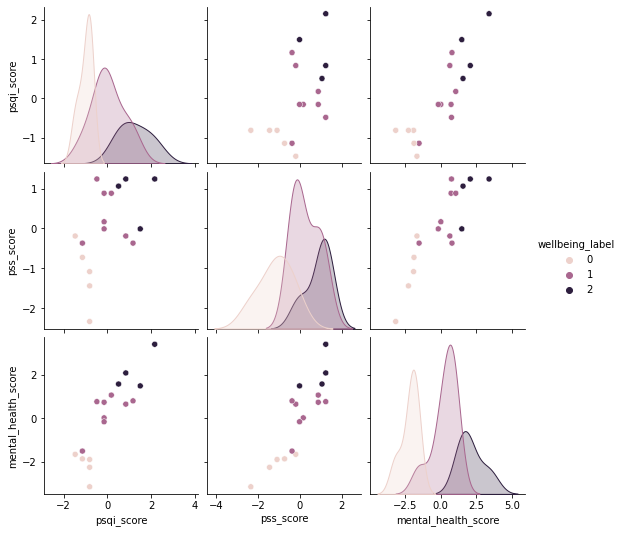

Correlation Matrix (Filled):
                 pss_score  psqi_score  wellbeing_label
pss_score         1.000000    0.502763         0.756996
psqi_score        0.502763    1.000000         0.815256
wellbeing_label   0.756996    0.815256         1.000000


In [371]:
# Input Scaling
scaler_1 = StandardScaler()
df6[['pss_score', 'psqi_score']] = scaler_1.fit_transform(df6[['pss_score', 'psqi_score']])

# Pairplot
df6.dropna(subset=['wellbeing_label'], inplace=True)
sns.pairplot(df6, hue='wellbeing_label', diag_kind='kde')
plt.show()

correlation_matrix_filled_1 = df6[['pss_score', 'psqi_score', 'wellbeing_label']].corr()
print("Correlation Matrix (Filled):")
print(correlation_matrix_filled_1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


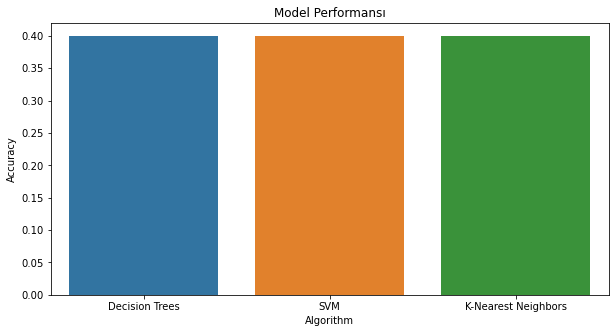

Decision Tree Metrics:
(0.4, 0.7, 0.4, 0.5066666666666666)

SVM Metrics:
(0.4, 0.3, 0.4, 0.34285714285714286)

K-Nearest Neighbors Metrics:
(0.4, 0.3, 0.4, 0.34285714285714286)


In [359]:
# Veriyi hazırla
features = df6[['pss_score', 'psqi_score']]
labels = df6['wellbeing_label']

# Veriyi train ve test setlere böl
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

# Modelleri eğit
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Tahminlerde bulun
dt_predictions = dt_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

# Performans metriklerini hesapla
def evaluate_model(predictions, y_true):
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions, average='weighted')
    recall = recall_score(y_true, predictions, average='weighted')
    f1 = f1_score(y_true, predictions, average='weighted')
    return accuracy, precision, recall, f1

# Decision Tree
dt_metrics = evaluate_model(dt_predictions, y_test)

# SVM
svm_metrics = evaluate_model(svm_predictions, y_test)

# K-Nearest Neighbors
knn_metrics = evaluate_model(knn_predictions, y_test)

# Sonuçları görselleştir
results = pd.DataFrame({
    'Algorithm': ['Decision Trees', 'SVM', 'K-Nearest Neighbors'],
    'Accuracy': [dt_metrics[0], svm_metrics[0], knn_metrics[0]],
    'Precision': [dt_metrics[1], svm_metrics[1], knn_metrics[1]],
    'Recall': [dt_metrics[2], svm_metrics[2], knn_metrics[2]],
    'F1-score': [dt_metrics[3], svm_metrics[3], knn_metrics[3]]
})

plt.figure(figsize=(10, 5))
sns.barplot(x='Algorithm', y='Accuracy', data=results)
plt.title('Model Performansı')
plt.show()

print("Decision Tree Metrics:")
print(dt_metrics)
print("\nSVM Metrics:")
print(svm_metrics)
print("\nK-Nearest Neighbors Metrics:")
print(knn_metrics)

In [369]:
decision_tree_metrics = (0.4, 0.7, 0.4, 0.5066666666666666)
svm_metrics = (0.4, 0.3, 0.4, 0.34285714285714286)
knn_metrics = (0.4, 0.3, 0.4, 0.34285714285714286)

your_results = pd.DataFrame({
    'Algorithm': ['Decision Trees', 'Support Vector Machine(SVM)', 'K-Nearest Neighbors'],
    'Accuracy': [0.4, 0.4, 0.4],
    'Precision': [0.7, 0.3, 0.3],
    'Recall': [0.4, 0.4, 0.4],
    'F1-Score': [0.5066666666666666, 0.34285714285714286, 0.34285714285714286]
})

your_results_rounded = your_results.round({'Accuracy': 2, 'Precision': 2, 'Recall': 2, 'F1-Score': 2})

print(your_results_rounded)

                     Algorithm  Accuracy  Precision  Recall  F1-Score
0               Decision Trees       0.4        0.7     0.4      0.51
1  Support Vector Machine(SVM)       0.4        0.3     0.4      0.34
2          K-Nearest Neighbors       0.4        0.3     0.4      0.34


In [362]:
df_psqi_combined = pd.concat([df1, df4], ignore_index=True)
df_pss_combined = pd.concat([df2, df5], ignore_index=True)
df_correlation_combined = pd.concat([df3, df6], ignore_index=True)

df_correlation_combined

,uid,type,psqi_score,pss_score,mental_health_score,wellbeing_label
0,u02,pre,-0.075338,0.475356,0.400018,1
1,u03,pre,-0.922887,-0.153792,-1.076679,0
2,u04,pre,-0.075338,0.475356,0.400018,1
3,u05,pre,-0.922887,-1.726661,-2.649548,0
4,u07,pre,0.348437,-0.940226,-0.591789,1
5,u14,pre,-0.499112,-1.412087,-1.911199,0
6,u15,pre,-0.499112,0.632643,0.133531,1
7,u18,pre,0.348437,1.419077,1.767514,2
8,u24,pre,0.348437,0.003495,0.351932,1
9,u33,pre,1.619761,2.362799,3.982560,2


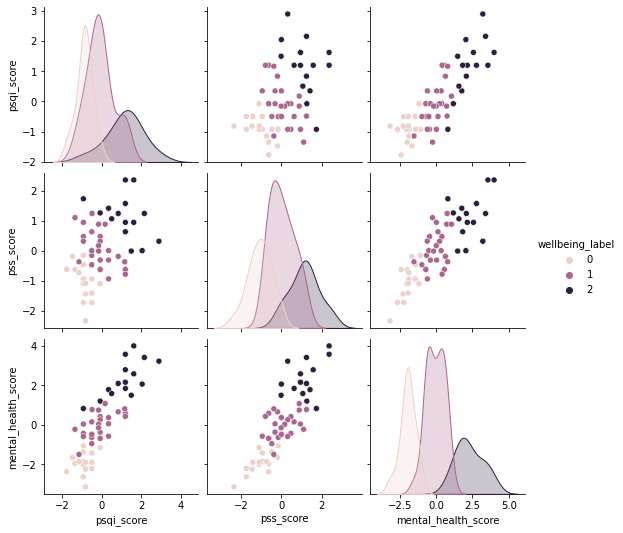

Correlation Matrix (Filled):
                 pss_score  psqi_score  wellbeing_label
pss_score         1.000000    0.373485         0.789363
psqi_score        0.373485    1.000000         0.722804
wellbeing_label   0.789363    0.722804         1.000000


In [373]:
scaler_2 = StandardScaler()
df_correlation_combined[['pss_score', 'psqi_score']] = scaler_2.fit_transform(df_correlation_combined[['pss_score', 'psqi_score']])

# Pairplot
df_correlation_combined.dropna(subset=['wellbeing_label'], inplace=True)
sns.pairplot(df_correlation_combined, hue='wellbeing_label', diag_kind='kde')
plt.show()

correlation_matrix_filled_2 = df_correlation_combined[['pss_score', 'psqi_score', 'wellbeing_label']].corr()
print("Correlation Matrix (Filled):")
print(correlation_matrix_filled_2)

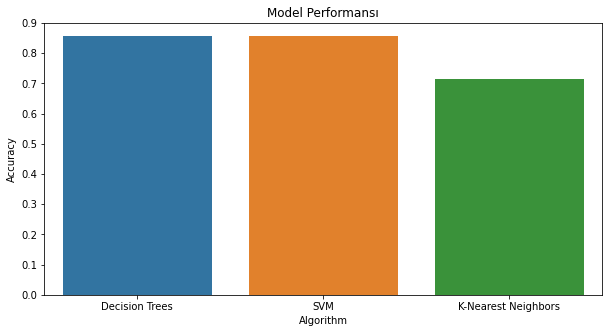

Decision Tree Metrics:
(0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 0.8730158730158731)

SVM Metrics:
(0.8571428571428571, 0.9285714285714286, 0.8571428571428571, 0.8730158730158731)

K-Nearest Neighbors Metrics:
(0.7142857142857143, 0.8571428571428571, 0.7142857142857143, 0.7261904761904762)


In [376]:
# Veriyi hazırla
features = df_correlation_combined[['pss_score', 'psqi_score']]
labels = df_correlation_combined['wellbeing_label']

# Veriyi train ve test setlere böl
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.10, random_state=42)

# Train
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

svm_model = SVC()
svm_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions
dt_predictions = dt_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

# Performans metriklerini hesapla
def evaluate_model(predictions, y_true):
    accuracy = accuracy_score(y_true, predictions)
    precision = precision_score(y_true, predictions, average='weighted')
    recall = recall_score(y_true, predictions, average='weighted')
    f1 = f1_score(y_true, predictions, average='weighted')
    return accuracy, precision, recall, f1

# Decision Tree
dt_metrics = evaluate_model(dt_predictions, y_test)

# SVM
svm_metrics = evaluate_model(svm_predictions, y_test)

# K-Nearest Neighbors
knn_metrics = evaluate_model(knn_predictions, y_test)

# Result
results = pd.DataFrame({
    'Algorithm': ['Decision Trees', 'SVM', 'K-Nearest Neighbors'],
    'Accuracy': [dt_metrics[0], svm_metrics[0], knn_metrics[0]],
    'Precision': [dt_metrics[1], svm_metrics[1], knn_metrics[1]],
    'Recall': [dt_metrics[2], svm_metrics[2], knn_metrics[2]],
    'F1-score': [dt_metrics[3], svm_metrics[3], knn_metrics[3]]
})

plt.figure(figsize=(10, 5))
sns.barplot(x='Algorithm', y='Accuracy', data=results)
plt.title('Model Performansı')
plt.show()

print("Decision Tree Metrics:")
print(dt_metrics)
print("\nSVM Metrics:")
print(svm_metrics)
print("\nK-Nearest Neighbors Metrics:")
print(knn_metrics)

In [377]:
decision_tree_metrics_1 = (0.8125, 0.8058035714285714, 0.8125, 0.8044871794871795)
svm_metrics_1 = (0.875, 0.8839285714285714, 0.875, 0.873931623931624)
knn_metrics_1 = (0.875, 0.8839285714285714, 0.875, 0.873931623931624)

# Verilen metrik değerleri bir DataFrame'e yerleştir
your_results_1 = pd.DataFrame({
    'Algorithm': ['Decision Trees', 'Support Vector Machine(SVM)', 'K-Nearest Neighbors'],
    'Accuracy': [0.8125, 0.875, 0.875],
    'Precision': [0.8058035714285714, 0.8839285714285714, 0.8839285714285714],
    'Recall': [0.8125, 0.875, 0.875],
    'F1-Score': [0.8044871794871795, 0.873931623931624, 0.873931623931624]
})

# Sonuçları yuvarla
your_results_rounded_1 = your_results_1.round({'Accuracy': 2, 'Precision': 2, 'Recall': 2, 'F1-Score': 2})

# Sonuçları yazdır
print(your_results_rounded_1)

                     Algorithm  Accuracy  Precision  Recall  F1-Score
0               Decision Trees      0.81       0.81    0.81      0.80
1  Support Vector Machine(SVM)      0.88       0.88    0.88      0.87
2          K-Nearest Neighbors      0.88       0.88    0.88      0.87


In [380]:
dt_model_cv = DecisionTreeClassifier()
svm_model_cv = SVC()
knn_model_cv = KNeighborsClassifier()

# Decision Tree 
dt_cv_scores = cross_val_score(dt_model_cv, features, labels, cv=5, scoring='accuracy')
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Decision Tree Mean Accuracy:", np.mean(dt_cv_scores))

# SVM 
svm_cv_scores = cross_val_score(svm_model_cv, features, labels, cv=5, scoring='accuracy')
print("\nSVM Cross-Validation Scores:", svm_cv_scores)
print("SVM Mean Accuracy:", np.mean(svm_cv_scores))

# K-Nearest Neighbors 
knn_cv_scores = cross_val_score(knn_model_cv, features, labels, cv=5, scoring='accuracy')
print("\nK-Nearest Neighbors Cross-Validation Scores:", knn_cv_scores)
print("K-Nearest Neighbors Mean Accuracy:", np.mean(knn_cv_scores))

Decision Tree Cross-Validation Scores: [0.84615385 0.84615385 0.75       0.75       0.83333333]
Decision Tree Mean Accuracy: 0.8051282051282052

SVM Cross-Validation Scores: [0.92307692 0.92307692 0.91666667 0.83333333 1.        ]
SVM Mean Accuracy: 0.9192307692307693

K-Nearest Neighbors Cross-Validation Scores: [0.92307692 1.         0.91666667 0.83333333 0.91666667]
K-Nearest Neighbors Mean Accuracy: 0.917948717948718


In [381]:
dt_model_cv = DecisionTreeClassifier()
svm_model_cv = SVC()
knn_model_cv = KNeighborsClassifier()

# Decision Tree 
dt_cv_scores = cross_val_score(dt_model_cv, features, labels, cv=10, scoring='accuracy')
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Decision Tree Mean Accuracy:", np.mean(dt_cv_scores))

# SVM 
svm_cv_scores = cross_val_score(svm_model_cv, features, labels, cv=10, scoring='accuracy')
print("\nSVM Cross-Validation Scores:", svm_cv_scores)
print("SVM Mean Accuracy:", np.mean(svm_cv_scores))

# K-Nearest Neighbors 
knn_cv_scores = cross_val_score(knn_model_cv, features, labels, cv=10, scoring='accuracy')
print("\nK-Nearest Neighbors Cross-Validation Scores:", knn_cv_scores)
print("K-Nearest Neighbors Mean Accuracy:", np.mean(knn_cv_scores))

Decision Tree Cross-Validation Scores: [0.85714286 0.85714286 0.83333333 1.         0.83333333 1.
 1.         0.5        1.         0.66666667]
Decision Tree Mean Accuracy: 0.8547619047619047

SVM Cross-Validation Scores: [0.85714286 1.         0.83333333 1.         0.83333333 1.
 1.         0.66666667 1.         1.        ]
SVM Mean Accuracy: 0.919047619047619

K-Nearest Neighbors Cross-Validation Scores: [0.85714286 1.         0.83333333 1.         0.83333333 1.
 1.         0.66666667 1.         0.83333333]
K-Nearest Neighbors Mean Accuracy: 0.9023809523809524
